In [1]:
import ROOT
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ROOT import TCanvas, TPaveText
from ROOT import gROOT

Welcome to JupyROOT 6.28/00


# Unbinned straight-line fit 
$$
f(x;\theta) = \frac{1+\theta x}{2}  , with x = cos(\alpha)
$$
$$
True ~value~ is ~\theta = 1/3
$$


In [32]:
fourteen_measurements = [0.251,-0.581 ,0.554,-0.365,0.230,0.623,-0.019,
                         -0.02,0.595,0.008,-0.475,0.592,0.017,-0.876]

In [33]:
len(fourteen_measurements)

14

In [57]:
def ln_L(theta,data_list):
    ln_L = 0
    for item in data_list:
        ln_L += np.log((1+item*theta)/2.0)
    return ln_L

In [58]:
theta_values = np.linspace(-0.9,0.9,200)
ln_values = [ln_L(theta,fourteen_measurements) for theta in theta_values]

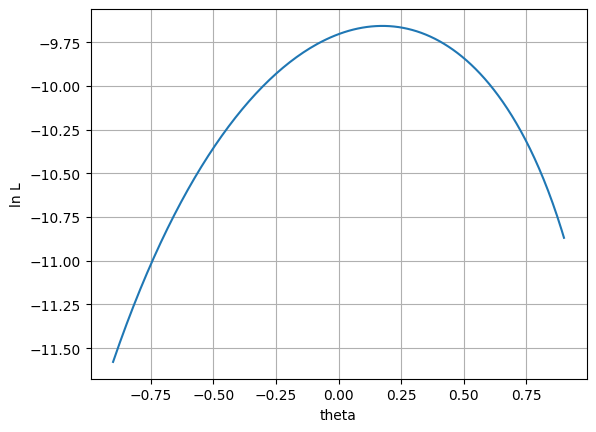

In [69]:
plt.plot(theta_values,ln_values)
plt.xlabel("theta")
plt.ylabel("ln L")
plt.grid("True")
plt.show()

In [70]:
max(ln_values)

-9.656858760464871

In [71]:
best_theta = theta_values[ln_values.index(max(ln_values))]

In [72]:
best_theta

0.1763819095477387

In [116]:
theta_minus = 0
theta_plus = 0
for i in range(len(ln_values)):
    if abs(ln_values[i]-max(ln_values)+1/2)<1e-2 and (best_theta - theta_values[i])> 0:
        theta_minus = best_theta - theta_values[i] 
    if abs(ln_values[i]-max(ln_values)+1/2)<1e-2 and (best_theta - theta_values[i])< 0:
        theta_plus = theta_values[i] - best_theta

In [117]:
theta_plus

0.5122244488977956

In [118]:
theta_minus

0.569939879759519

# Results 
$$
\theta = 0.17 ^{+0.51}_{-0.56}
$$